In [40]:
# Library & Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns
import numpy as np

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

##### Change to import file #####
df = pd.read_excel('/content/drive/MyDrive/School + State Finance Project/2022-12-15 Data for Skills Exercise.xlsx')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MUNICIPALITY,Town Number,Preliminary Live Birth Counts,Preliminary Birth Rate,Estimated Population,Estimated Median Home Value,Labor Force,Unemployed,Unemployment Rate,Median Household Income,SNAP Recipients,Poverty Status,Associate's Degree,Bachelor's Degree or higher,"High School Diploma, GED, or equivalent",Less than High School Diploma,Some College,Percent without Health Insurance
0,ANDOVER,1,23,7.3,3149,297400,1956,130,6.6,99449,27,80,244,901,613,79,493,0.029264
1,ANSONIA,2,173,9.2,18902,217800,9209,1002,10.9,53709,745,2744,1011,3278,5317,1614,2976,0.047410
2,ASHFORD,3,33,7.9,4185,271700,2576,155,6.0,84909,76,291,267,1020,1222,190,412,0.050984
3,AVON,4,141,7.5,18918,371900,9395,487,5.2,123077,121,793,747,8690,1252,421,1913,0.007682
4,BARKHAMSTED,5,22,6.0,3650,262900,2281,139,6.1,103500,21,212,209,1170,640,124,470,0.016271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,WINDSOR LOCKS,165,114,9.1,12592,195200,7601,598,7.9,72090,263,1009,938,2307,3548,521,1840,0.026177
165,WOLCOTT,166,121,7.5,16117,248100,9870,657,6.7,96014,188,612,1033,3660,3733,650,2898,0.015837
166,WOODBRIDGE,167,68,7.5,9074,472400,4652,249,5.4,169155,37,216,320,4567,616,202,658,0.032577
167,WOODBURY,168,53,5.5,9711,383100,5467,339,6.2,100850,22,478,503,3477,1746,270,1519,0.018365


In [41]:
# Correlation table of all variables (for variable selection)
df.corr()

,Town Number,Preliminary Live Birth Counts,Preliminary Birth Rate,Estimated Population,Estimated Median Home Value,Labor Force,Unemployed,Unemployment Rate,Median Household Income,SNAP Recipients,Poverty Status,Associate's Degree,Bachelor's Degree or higher,"High School Diploma, GED, or equivalent",Less than High School Diploma,Some College,Percent without Health Insurance
Town Number,1.000000,0.042084,-0.016646,0.058754,0.031925,0.061620,0.039855,0.038185,0.017269,0.041687,-0.004038,0.055054,0.093462,0.049966,-0.003235,0.051857,0.001879
Preliminary Live Birth Counts,0.042084,1.000000,0.610775,0.985654,-0.060648,0.972426,0.984103,0.515519,-0.261826,0.852381,0.910856,0.905596,0.775174,0.949843,0.935428,0.956019,0.548828
Preliminary Birth Rate,-0.016646,0.610775,1.000000,0.580436,-0.204310,0.588130,0.602701,0.562470,-0.249138,0.568612,0.509987,0.612774,0.418907,0.613001,0.537513,0.619801,0.355192
Estimated Population,0.058754,0.985654,0.580436,1.000000,-0.026125,0.993533,0.973258,0.488346,-0.224455,0.825787,0.872777,0.930172,0.835537,0.945074,0.892989,0.963156,0.507800
Estimated Median Home Value,0.031925,-0.060648,-0.204310,-0.026125,1.000000,-0.061968,-0.138238,-0.362415,0.818239,-0.250091,-0.158403,-0.186205,0.278980,-0.225771,-0.162903,-0.181504,-0.108764
Labor Force,0.061620,0.972426,0.588130,0.993533,-0.061968,1.000000,0.959827,0.468796,-0.243277,0.804396,0.835937,0.946071,0.849141,0.940580,0.862468,0.963392,0.501754
Unemployed,0.039855,0.984103,0.602701,0.973258,-0.138238,0.959827,1.000000,0.595614,-0.330423,0.886320,0.928643,0.919238,0.705110,0.975468,0.954608,0.974511,0.552204
Unemployment Rate,0.038185,0.515519,0.562470,0.488346,-0.362415,0.468796,0.595614,1.000000,-0.496997,0.612852,0.541809,0.530028,0.172062,0.607884,0.562234,0.594127,0.384487
Median Household Income,0.017269,-0.261826,-0.249138,-0.224455,0.818239,-0.243277,-0.330423,-0.496997,1.000000,-0.437373,-0.358713,-0.325690,0.119950,-0.406958,-0.353828,-0.353853,-0.346388
SNAP Recipients,0.041687,0.852381,0.568612,0.825787,-0.250091,0.804396,0.886320,0.612852,-0.437373,1.000000,0.884607,0.805586,0.444844,0.919577,0.877950,0.869957,0.470545


In [42]:
# Select 5 town-level variables for the final socioeconomic measure 

# Category:
# Income, Employment, Education, Housing, Health Insurance

# Corresponding variables selected:
# Median Household Income, Unemployment Rate, Bachelor's Degre or higher; Estimated Median Home Value; Percent without Health Insurance

# (Due to the limit of town level variables, here we use Bachelor's Degree or Higher to represent education level)

# Calculate Bachelor\'s Degree or higher rate
df["Bachelor\'s Degree or higher Rate"] = df['Bachelor\'s Degree or higher'] / df['Estimated Population']

# Create dataframe from all selected variables
df_selected = df[['MUNICIPALITY', 'Median Household Income', 'Unemployment Rate', "Bachelor's Degree or higher Rate", 'Estimated Median Home Value', 'Percent without Health Insurance']]
df_selected

,MUNICIPALITY,Median Household Income,Unemployment Rate,Bachelor's Degree or higher Rate,Estimated Median Home Value,Percent without Health Insurance
0,ANDOVER,99449,6.6,0.286123,297400,0.029264
1,ANSONIA,53709,10.9,0.173421,217800,0.047410
2,ASHFORD,84909,6.0,0.243728,271700,0.050984
3,AVON,123077,5.2,0.459351,371900,0.007682
4,BARKHAMSTED,103500,6.1,0.320548,262900,0.016271
...,...,...,...,...,...,...
164,WINDSOR LOCKS,72090,7.9,0.183212,195200,0.026177
165,WOLCOTT,96014,6.7,0.227089,248100,0.015837
166,WOODBRIDGE,169155,5.4,0.503306,472400,0.032577
167,WOODBURY,100850,6.2,0.358048,383100,0.018365


In [43]:
# Calculate z-scores for each variable for further aggregation (standardizing scores on the same scale)
# z-score = (x-mu)/std
MHI_mean = df_selected['Median Household Income'].mean()
MHI_std = df_selected['Median Household Income'].std()
MHI_z = (df_selected['Median Household Income']-MHI_mean)/MHI_std

UR_mean = df_selected['Unemployment Rate'].mean()
UR_std = df_selected['Unemployment Rate'].std()
UR_z = (df_selected['Unemployment Rate']-UR_mean)/UR_std

BDR_mean = df_selected["Bachelor's Degree or higher Rate"].mean()
BDR_std = df_selected["Bachelor's Degree or higher Rate"].std()
BDR_z = (df_selected["Bachelor's Degree or higher Rate"]-BDR_mean)/BDR_std

EMHV_mean = df_selected['Estimated Median Home Value'].mean()
EMHV_std = df_selected['Estimated Median Home Value'].std()
EMHV_z = (df_selected['Estimated Median Home Value']-EMHV_mean)/EMHV_std

PwoHC_mean = df_selected['Percent without Health Insurance'].mean()
PwoHC_std = df_selected['Percent without Health Insurance'].std()
PwoHC_z = (df_selected['Percent without Health Insurance']-PwoHC_mean)/PwoHC_std

# Insert z-scores to dataframe
df_selected.insert(loc = 2, column = 'Median Household Income Z Score', value = MHI_z)
df_selected.insert(loc = 4, column = 'Unemployment Rate Z Score', value = UR_z)
df_selected.insert(loc = 6, column = 'Bachelor\'s Degree or higher Rate Z Score', value = BDR_z)
df_selected.insert(loc = 8, column = 'Estimated Median Home Value Z Score', value = EMHV_z)
df_selected.insert(loc = 10, column = 'Percent without Health Insurance Z Score', value = PwoHC_z)


df_selected

,MUNICIPALITY,Median Household Income,Median Household Income Z Score,Unemployment Rate,Unemployment Rate Z Score,Bachelor's Degree or higher Rate,Bachelor's Degree or higher Rate Z Score,Estimated Median Home Value,Estimated Median Home Value Z Score,Percent without Health Insurance,Percent without Health Insurance Z Score
0,ANDOVER,99449,0.105319,6.6,-0.138775,0.286123,-0.142649,297400,-0.162304,0.029264,-0.285000
1,ANSONIA,53709,-1.318945,10.9,2.326934,0.173421,-1.217074,217800,-0.581676,0.047410,0.463304
2,ASHFORD,84909,-0.347431,6.0,-0.482827,0.243728,-0.546815,271700,-0.297704,0.050984,0.610674
3,AVON,123077,0.841053,5.2,-0.941563,0.459351,1.508795,371900,0.230199,0.007682,-1.174966
4,BARKHAMSTED,103500,0.231460,6.1,-0.425485,0.320548,0.185539,262900,-0.344067,0.016271,-0.820758
...,...,...,...,...,...,...,...,...,...,...,...
164,WINDSOR LOCKS,72090,-0.746593,7.9,0.606672,0.183212,-1.123735,195200,-0.700744,0.026177,-0.412294
165,WOLCOTT,96014,-0.001641,6.7,-0.081432,0.227089,-0.705433,248100,-0.422041,0.015837,-0.838654
166,WOODBRIDGE,169155,2.275841,5.4,-0.826879,0.503306,1.927836,472400,0.759682,0.032577,-0.148354
167,WOODBURY,100850,0.148943,6.2,-0.368143,0.358048,0.543036,383100,0.289206,0.018365,-0.734424


In [44]:
# Aggregate z-scores to an overall index to represent area-level SES
# Here we set the coefficient of the "big three" (the traditional measures of SES -  education, income, and occupation) to 0.3; and the coefficient of housing and health insurance to 0.05
# Note that Unemployment Rate and Percent without Health Insurance are reverse coded
ses = 0.3 * MHI_z - 0.3 * UR_z + BDR_z * 0.3 + 0.05 * EMHV_z - 0.05 * PwoHC_z
ses.describe()

count    1.690000e+02
mean     3.416071e-17
std      8.394744e-01
min     -2.349574e+00
25%     -5.143068e-01
50%      4.316937e-02
75%      4.775527e-01
max      2.652548e+00
dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


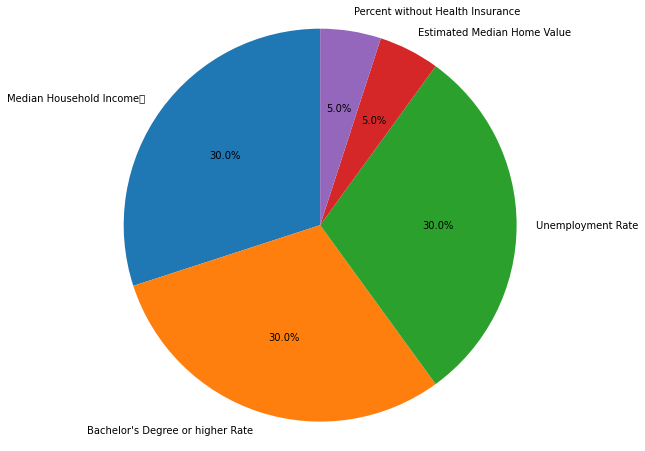

In [45]:
# Pie chart showing the percentage of variables in the final measure
sizes = np.array([0.3, 0.3, 0.3, 0.05, 0.05])
labels = ["Median Household Income	", "Bachelor's Degree or higher Rate", "Unemployment Rate", "Estimated Median Home Value", "Percent without Health Insurance"]

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, radius=5)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

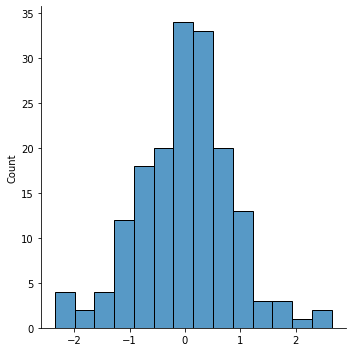

In [46]:
# Distribution plot of Socioeconomic Status
sns.displot(ses)

In [47]:
# Add Socioeconomic Status to dataframe
df_selected['Socioeconomic Status'] = ses
df_selected

<ipython-input-47-bcbf4ce50e4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Socioeconomic Status'] = ses


,MUNICIPALITY,Median Household Income,Median Household Income Z Score,Unemployment Rate,Unemployment Rate Z Score,Bachelor's Degree or higher Rate,Bachelor's Degree or higher Rate Z Score,Estimated Median Home Value,Estimated Median Home Value Z Score,Percent without Health Insurance,Percent without Health Insurance Z Score,Socioeconomic Status
0,ANDOVER,99449,0.105319,6.6,-0.138775,0.286123,-0.142649,297400,-0.162304,0.029264,-0.285000,0.036568
1,ANSONIA,53709,-1.318945,10.9,2.326934,0.173421,-1.217074,217800,-0.581676,0.047410,0.463304,-1.511135
2,ASHFORD,84909,-0.347431,6.0,-0.482827,0.243728,-0.546815,271700,-0.297704,0.050984,0.610674,-0.168845
3,AVON,123077,0.841053,5.2,-0.941563,0.459351,1.508795,371900,0.230199,0.007682,-1.174966,1.057682
4,BARKHAMSTED,103500,0.231460,6.1,-0.425485,0.320548,0.185539,262900,-0.344067,0.016271,-0.820758,0.276580
...,...,...,...,...,...,...,...,...,...,...,...,...
164,WINDSOR LOCKS,72090,-0.746593,7.9,0.606672,0.183212,-1.123735,195200,-0.700744,0.026177,-0.412294,-0.757522
165,WOLCOTT,96014,-0.001641,6.7,-0.081432,0.227089,-0.705433,248100,-0.422041,0.015837,-0.838654,-0.166862
166,WOODBRIDGE,169155,2.275841,5.4,-0.826879,0.503306,1.927836,472400,0.759682,0.032577,-0.148354,1.554569
167,WOODBURY,100850,0.148943,6.2,-0.368143,0.358048,0.543036,383100,0.289206,0.018365,-0.734424,0.369218


In [48]:
# Create a categorical scale of Socioeconomic Status

# Upper Class: > 1.5
# Upper Middle Class: 0.5 - 1.5
# Middle Class: -0.5 - 0.5
# Lower Middle Class: -1.5 - -0.5
# Lower Class: < -1.5

# (This scale can be changed to other discrete measurement)

def scale(row):
  if row['Socioeconomic Status'] > 1.5:
    return 'Upper Class'
  elif row['Socioeconomic Status'] > 0.5 and row['Socioeconomic Status'] <= 1.5:
    return 'Upper Middle Class'
  elif row['Socioeconomic Status'] >= -0.5 and row['Socioeconomic Status'] <= 0.5:
    return 'Middle Class'
  elif row['Socioeconomic Status'] < -0.5 and row['Socioeconomic Status'] >= -1.5:
    return 'Lower Middle Class'
  else:
    return 'Lower Class'

# Add final measure - Socioeconomic Class to the dataframe
df_selected['Socioeconomic Class'] = df_selected.apply(scale, axis=1)
df_selected

<ipython-input-48-64fc9436011c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Socioeconomic Class'] = df_selected.apply(scale, axis=1)


,MUNICIPALITY,Median Household Income,Median Household Income Z Score,Unemployment Rate,Unemployment Rate Z Score,Bachelor's Degree or higher Rate,Bachelor's Degree or higher Rate Z Score,Estimated Median Home Value,Estimated Median Home Value Z Score,Percent without Health Insurance,Percent without Health Insurance Z Score,Socioeconomic Status,Socioeconomic Class
0,ANDOVER,99449,0.105319,6.6,-0.138775,0.286123,-0.142649,297400,-0.162304,0.029264,-0.285000,0.036568,Middle Class
1,ANSONIA,53709,-1.318945,10.9,2.326934,0.173421,-1.217074,217800,-0.581676,0.047410,0.463304,-1.511135,Lower Class
2,ASHFORD,84909,-0.347431,6.0,-0.482827,0.243728,-0.546815,271700,-0.297704,0.050984,0.610674,-0.168845,Middle Class
3,AVON,123077,0.841053,5.2,-0.941563,0.459351,1.508795,371900,0.230199,0.007682,-1.174966,1.057682,Upper Middle Class
4,BARKHAMSTED,103500,0.231460,6.1,-0.425485,0.320548,0.185539,262900,-0.344067,0.016271,-0.820758,0.276580,Middle Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,WINDSOR LOCKS,72090,-0.746593,7.9,0.606672,0.183212,-1.123735,195200,-0.700744,0.026177,-0.412294,-0.757522,Lower Middle Class
165,WOLCOTT,96014,-0.001641,6.7,-0.081432,0.227089,-0.705433,248100,-0.422041,0.015837,-0.838654,-0.166862,Middle Class
166,WOODBRIDGE,169155,2.275841,5.4,-0.826879,0.503306,1.927836,472400,0.759682,0.032577,-0.148354,1.554569,Upper Class
167,WOODBURY,100850,0.148943,6.2,-0.368143,0.358048,0.543036,383100,0.289206,0.018365,-0.734424,0.369218,Middle Class


In [49]:
# Count the number of towns in each class
df_counts = df_selected.groupby(["Socioeconomic Class"])["MUNICIPALITY"].count()
df_counts

Socioeconomic Class
Lower Class            7
Lower Middle Class    36
Middle Class          84
Upper Class            7
Upper Middle Class    35
Name: MUNICIPALITY, dtype: int64

In [50]:
# Calculate the mean value of variables in each class
df_means = df_selected.groupby(["Socioeconomic Class"])["Median Household Income", "Unemployment Rate", "Bachelor's Degree or higher Rate", "Estimated Median Home Value", "Percent without Health Insurance"].mean()
df_means

<ipython-input-50-c4c109f8f82d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_means = df_selected.groupby(["Socioeconomic Class"])["Median Household Income", "Unemployment Rate", "Bachelor's Degree or higher Rate", "Estimated Median Home Value", "Percent without Health Insurance"].mean()


,Median Household Income,Unemployment Rate,Bachelor's Degree or higher Rate,Estimated Median Home Value,Percent without Health Insurance
Socioeconomic Class,,,,,
Lower Class,48008.285714,12.142857,0.134172,1.751857e+05,0.077364
Lower Middle Class,71548.277778,8.358333,0.182504,2.113111e+05,0.043902
Middle Class,91587.261905,6.446429,0.301648,3.008667e+05,0.033420
Upper Class,202193.714286,5.685714,0.507291,1.043329e+06,0.023025
Upper Middle Class,120422.628571,5.402857,0.413848,4.016371e+05,0.029232


In [51]:
# Download ouput
df_counts.to_excel("df_counts_output.xlsx") 
files.download("df_counts_output.xlsx")
df_means.to_excel("df_means_output.xlsx") 
files.download("df_means_output.xlsx")
df_selected.to_excel("df_selected_output.xlsx") 
files.download("df_selected_output.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>